In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('performance_test.csv')
df


,n,m,k,k_type,brute,heuristic
0,10,19,9,k/2,NaN,0.000228
1,10,24,12,k/2,NaN,0.000203
2,10,25,12,k/2,NaN,0.000184
3,10,17,8,k/2,NaN,0.000180
4,10,21,10,k/2,NaN,0.000152
...,...,...,...,...,...,...
1395,1000,249802,124901,k/2,NaN,41.791537
1396,1000,249450,124725,k/2,NaN,46.945254
1397,1000,249059,124529,k/2,NaN,51.201053
1398,1000,249271,124635,k/2,NaN,58.667936


n = 10, sample mean = 0.00022448658943171162, sample std = 9.147545214519521e-05, lower bound = 0.00021381390886525607, upper bound = 0.00023515926999816716
n = 20, sample mean = 0.001045851707458447, sample std = 0.0015551870240527873, lower bound = 0.0008644039644894734, upper bound = 0.0012272994504274207
n = 50, sample mean = 0.007574962377548165, sample std = 0.0014754115495123465, lower bound = 0.007402822248117478, upper bound = 0.007747102506978852
n = 100, sample mean = 0.05453288555145258, sample std = 0.008722429628794716, lower bound = 0.053515216843526954, upper bound = 0.05555055425937821
n = 200, sample mean = 0.4046731173992157, sample std = 0.06239476673936145, lower bound = 0.39739335655834307, upper bound = 0.4119528782400883
n = 500, sample mean = 7.361952663660049, sample std = 0.9673213011598399, lower bound = 7.249092754140057, upper bound = 7.474812573180041
n = 1000, sample mean = 62.868611347675326, sample std = 9.627741845994773, lower bound = 61.745317492450

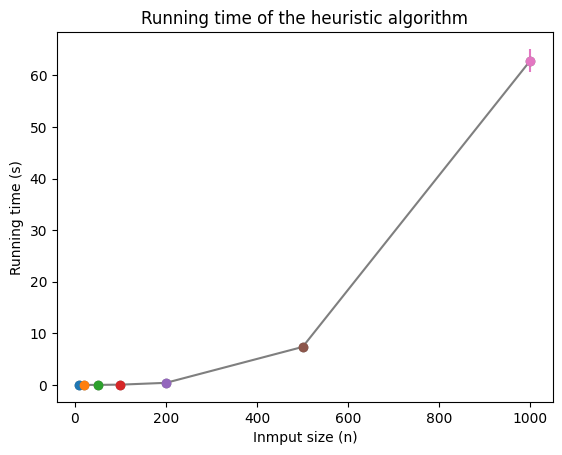

In [ ]:

n_set = [10, 20, 50, 100, 200, 500, 1000]
means = []
for n in n_set:
    # Get sample meand and sample standard deviation
    df_k = df[df['n'] == n]

    # Get the sample mean and sample standard deviation
    sample_mean = df_k['heuristic'].mean()
    sample_std = df_k['heuristic'].std()

    # Calculate the confidence interval and t value
    lower_bound = sample_mean - 1.65 * sample_std / np.sqrt(len(df_k))
    upper_bound = sample_mean + 1.65 * sample_std / np.sqrt(len(df_k))

    print(f"n = {n}, sample mean = {sample_mean}, sample std = {sample_std}, lower bound = {lower_bound}, upper bound = {upper_bound}")

    # Add the confidence interval to the plot
    means.append(sample_mean)
    plt.errorbar(n, sample_mean, yerr=upper_bound - lower_bound, fmt='o')

# Plot the sample means and the confidence intervals

plt.plot(n_set, means, 'o-')
plt.xlabel('Inmput size (n)')
plt.ylabel('Running time (s)')
plt.title('Running time of the heuristic algorithm')
plt.show()
    

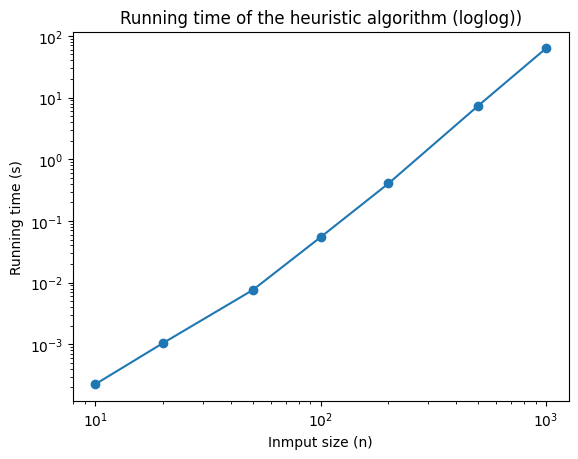

Slope:  2.7408698055199254


In [ ]:
# Draw the log log plot

plt.loglog(n_set, means, 'o-')
plt.xlabel('Inmput size (n)')
plt.ylabel('Running time (s)')
plt.title('Running time of the heuristic algorithm (loglog))')
plt.show()

# print the slope
print('Slope: ', np.polyfit(np.log(n_set), np.log(means), 1)[0])

In [44]:
# read quality_test.csv

df = pd.read_csv('quality_test.csv')
df

,n,m,k,k_type,brute_time,brute_result,heuristic_time,heuristic_result
0,10,21,0,0,0.001944,False,0.000289,False
1,10,21,21,k,0.000041,True,0.000139,True
2,10,21,10,k/2,0.000094,True,0.000170,True
3,10,21,11,random,0.000047,True,0.000209,True
4,10,20,0,0,0.001888,False,0.000195,False
...,...,...,...,...,...,...,...,...
5595,22,114,76,random,0.000145,True,0.001077,True
5596,22,124,0,0,20.822752,False,0.000995,False
5597,22,124,124,k,0.000071,True,0.001173,True
5598,22,124,62,k/2,0.000552,True,0.001411,True


In [45]:
# get accuracy of brute_result and heuristic_result is the same
df['same'] = df['brute_result'] == df['heuristic_result']
df

,n,m,k,k_type,brute_time,brute_result,heuristic_time,heuristic_result,same
0,10,21,0,0,0.001944,False,0.000289,False,True
1,10,21,21,k,0.000041,True,0.000139,True,True
2,10,21,10,k/2,0.000094,True,0.000170,True,True
3,10,21,11,random,0.000047,True,0.000209,True,True
4,10,20,0,0,0.001888,False,0.000195,False,True
...,...,...,...,...,...,...,...,...,...
5595,22,114,76,random,0.000145,True,0.001077,True,True
5596,22,124,0,0,20.822752,False,0.000995,False,True
5597,22,124,124,k,0.000071,True,0.001173,True,True
5598,22,124,62,k/2,0.000552,True,0.001411,True,True


In [46]:

for n in range(10, 24, 2):
    df_k = df[df['n'] == n]
    print(f"n = {n}, accuracy = {df_k['same'].mean()}")

n = 10, accuracy = 0.99875
n = 12, accuracy = 0.99875
n = 14, accuracy = 0.99875
n = 16, accuracy = 0.99625
n = 18, accuracy = 0.9975
n = 20, accuracy = 0.99625
n = 22, accuracy = 0.99625


In [47]:
print(f"n = all samples, accuracy = {df['same'].mean()}")

n = all samples, accuracy = 0.9975


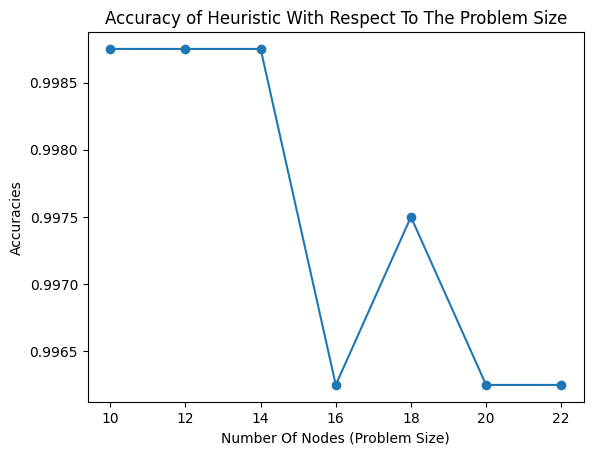

In [49]:
# Draw acc plot
accuracies = [0.99875,0.99875,0.99875,0.99625,0.9975,0.99625,0.99625]
number_of_nodes = [10,12,14,16,18,20,22]

plt.plot(number_of_nodes, accuracies, 'o-')
plt.xlabel('Number Of Nodes (Problem Size)')
plt.ylabel('Accuracies')
plt.title('Accuracy of Heuristic With Respect To The Problem Size')
plt.show()